<a href="https://colab.research.google.com/github/saicham/Study/blob/main/pycaret_automl_%ED%98%B8%EC%88%98%EA%B3%B5%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AutoML 패키지 설치
#### 참고 사이트 : https://pycaret.gitbook.io/docs/get-started/quickstart
---

In [ ]:
!pip install pycaret

### 데이터 읽어오기
---

In [1]:
# 2. Google Drive 연결
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [14]:
# 3. Google Drive에 있는 iris 데이터 로드
import pandas as pd
# data = pd.read_csv('/content/drive/My Drive/Automl_test/insurance.csvv')
data = pd.read_csv('/content/drive/My Drive/Automl_test/(학습용)호수공원Top10출발지대여소일일집계.csvv')

In [65]:
data.head(3)

,st_spot,weeks,holiday,rain,wind,cloud,temp,gtemp,festv,cnt
0,10000057,5,0,0.0,4.3,9.0,9.844231,15.865385,1,52
1,10000057,6,1,0.0,2.9,6.0,10.226000,20.946000,1,50
2,10000057,0,1,0.0,3.5,6.0,11.847917,24.035417,1,48


### AutoML 알고리즘에 데이터 적용
---

In [32]:
from pycaret.regression import *
# data : 훈련할 원시데이터
# target : target 데이터
# normalize : 데이터 정규화 수행여부
# Normalize method : 정규화 알고리즘 zscore, minmax, maxabs, robust
s = setup(data, target = 'cnt', normalize=True, session_id = 42)

,Description,Value
0,Session id,42
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(1229, 10)"
4,Transformed data shape,"(1229, 10)"
5,Transformed train set shape,"(860, 10)"
6,Transformed test set shape,"(369, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


### 학습이 가능한 모델
---

In [31]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### 모델 훈련
---

In [51]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.0109,336.0557,18.2856,0.7766,0.3700,0.4159,0.1440
xgboost,Extreme Gradient Boosting,14.1859,348.7433,18.6140,0.7677,0.3571,0.3577,0.0880
rf,Random Forest Regressor,14.2936,358.1264,18.8451,0.7630,0.3668,0.3922,0.1670
et,Extra Trees Regressor,14.4853,355.2526,18.7979,0.7630,0.3694,0.3921,0.3250
gbr,Gradient Boosting Regressor,14.4842,359.5200,18.8815,0.7626,0.3822,0.3882,0.1950
dt,Decision Tree Regressor,18.7837,716.5186,26.5176,0.5279,0.4300,0.4143,0.0780
ada,AdaBoost Regressor,23.4614,796.4532,28.1503,0.4735,0.5115,0.6720,0.1900
knn,K Neighbors Regressor,26.2516,1117.1977,33.3329,0.2550,0.5299,0.6678,0.0830
llar,Lasso Least Angle Regression,27.9642,1257.2225,35.3214,0.1714,0.5661,0.7905,0.0810
lasso,Lasso Regression,27.9642,1257.2292,35.3215,0.1714,0.5661,0.7906,0.1400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### 우수 모델 : lightgbm(Light Gradient Boosting Machine)
---

In [62]:
pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,13.1934,307.3316,17.5309,0.7781,0.3619,0.4044


#### 성능 지표
#### 1. 학습 파이프라인
---

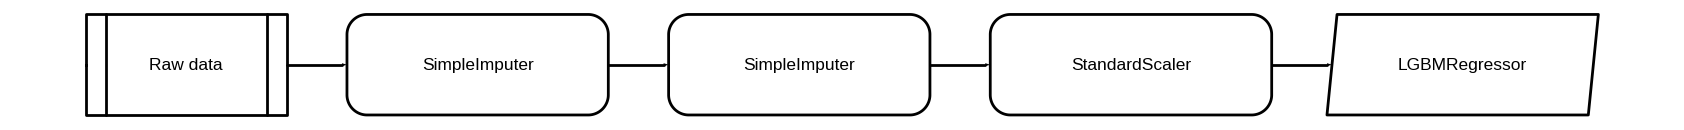

In [53]:
plot_model(best_model, plot ='pipeline' )

#### 2. 하이퍼파라미터
---

In [54]:
plot_model(best_model, plot ='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


#### 3.훈련데이터와 검증데이터 오차
---

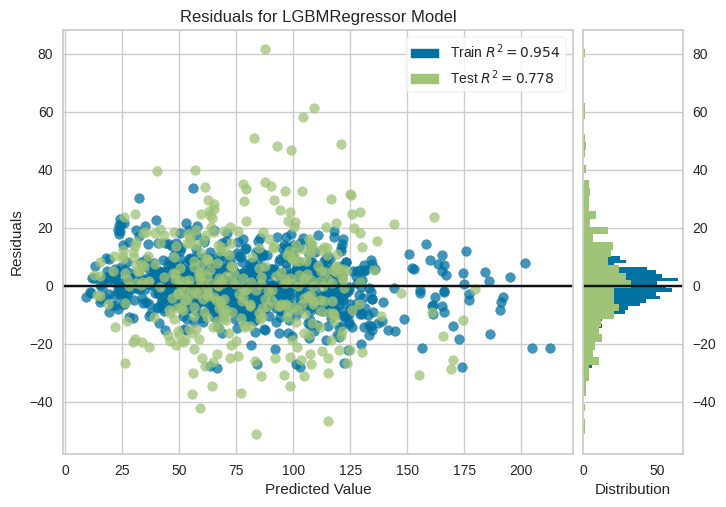

In [55]:
plot_model(best_model, plot = 'residuals')

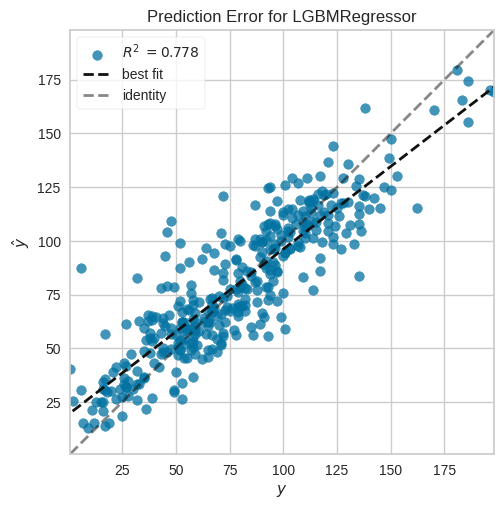

In [56]:
plot_model(best_model, plot ='error' )

#### 4.훈련데이터와 검증데이터 결정계수 Score 추이
---

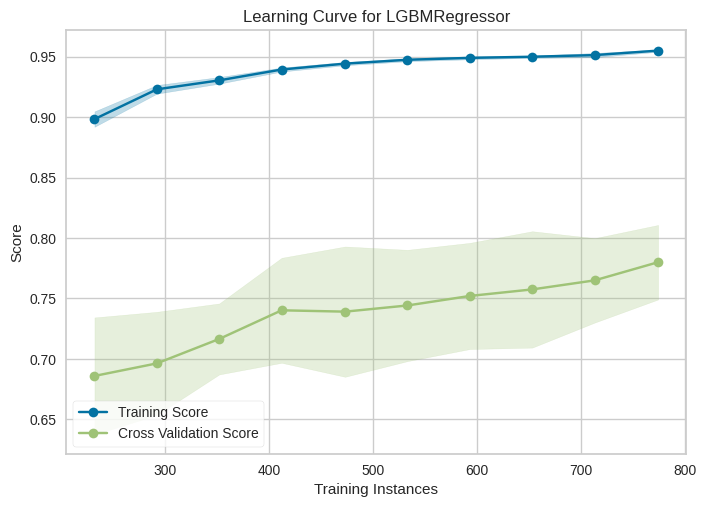

In [57]:
plot_model(best_model, plot ='learning' )

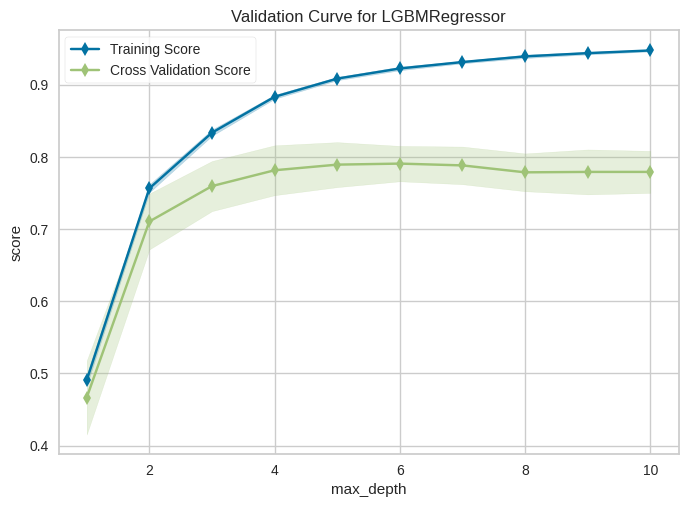

In [58]:
plot_model(best_model, plot ='vc' )

#### 5.Test Data 예측결과
---

In [61]:
pred

,st_spot,weeks,holiday,rain,wind,cloud,temp,gtemp,festv,cnt,prediction_label
548,10000320,0,1,0.0,3.0,6.0,23.311111,31.601852,0,54,62.372079
1125,10000480,2,0,0.0,3.9,7.0,17.556818,20.118181,0,44,61.603028
244,10000278,5,0,0.0,4.3,10.0,8.846154,11.871795,1,78,56.257220
552,10000320,4,0,0.3,2.6,10.0,20.790226,27.724060,0,133,98.485458
1163,10000480,5,0,0.0,4.3,8.0,22.385185,28.669136,1,81,79.717627
...,...,...,...,...,...,...,...,...,...,...,...
904,10000440,4,0,0.0,1.8,10.0,23.241405,27.854687,0,128,117.820043
273,10000278,6,1,0.0,2.6,10.0,14.849231,18.100000,1,65,62.292006
427,10000316,1,0,0.0,2.3,8.0,23.778410,29.248863,0,88,71.671354
362,10000278,4,0,3.0,3.1,8.0,27.321739,34.931522,0,92,87.440242


#### 6.모델저장
---

In [64]:
save_model(best_model, '호수공원_AutoML_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['st_spot', 'weeks', 'holiday',
                                              'rain', 'wind', 'cloud', 'temp',
                                              'gtemp', 'festv'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', LGBMRegressor(random_state=42))]),
 '호수공원_AutoML_pycaret.pkl')

In [ ]:
tuned_rf = tune_model(rf)